In [ ]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [37]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [38]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [39]:
tesla = yf.Ticker("TSLA")
tesla_share_data = tesla.history(period = "Max")
tesla_share_data.reset_index(inplace = True)
tesla_share_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [40]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [41]:
soup = BeautifulSoup(html_data,"html5lib")

In [42]:
tesla_revenue = pd.read_html(url, match = "Tesla Quarterly Revenue", flavor = 'bs4')[0]
tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)':'Date','Tesla Quarterly Revenue(Millions of US $).1':'Revenue'},inplace = True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$","").str.replace(",","")
tesla_revenue.dropna(inplace=True)
tesla_revenue.reset_index(drop = True, inplace = True)
tesla_revenue.head()

,Date,Revenue
0,2020-12-31,10744
1,2020-09-30,8771
2,2020-06-30,6036
3,2020-03-31,5985
4,2019-12-31,7384


In [43]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period = 'Max')
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [44]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [45]:
soup = BeautifulSoup(html_data, "html5lib")

In [46]:
gme_revenue = pd.read_html(url, match = "GameStop Quarterly Revenue", flavor = 'bs4')[0]
gme_revenue.rename(columns = {"GameStop Quarterly Revenue(Millions of US $)":"Date","GameStop Quarterly Revenue(Millions of US $).1":"Revenue"}, inplace = True)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$","").str.replace(",","")
gme_revenue.dropna(inplace = True)
gme_revenue.reset_index(drop = True, inplace = True)
gme_revenue.head()

,Date,Revenue
0,2020-10-31,1005
1,2020-07-31,942
2,2020-04-30,1021
3,2020-01-31,2194
4,2019-10-31,1439


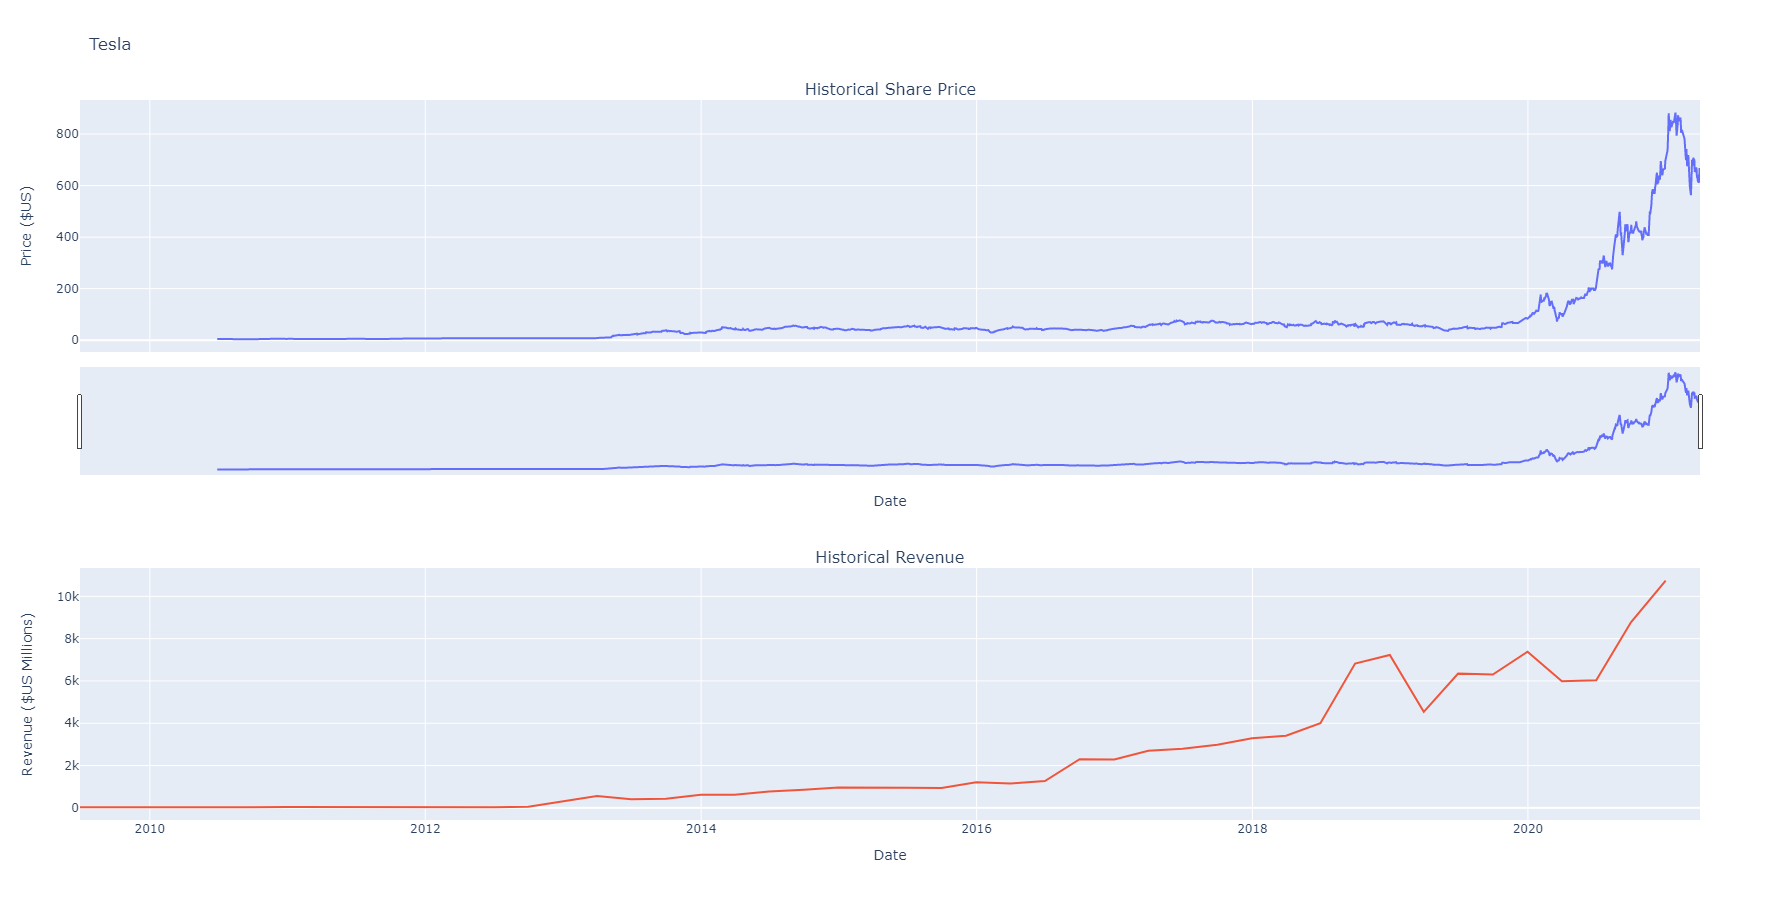

In [47]:
make_graph(tesla_share_data, tesla_revenue, 'Tesla')

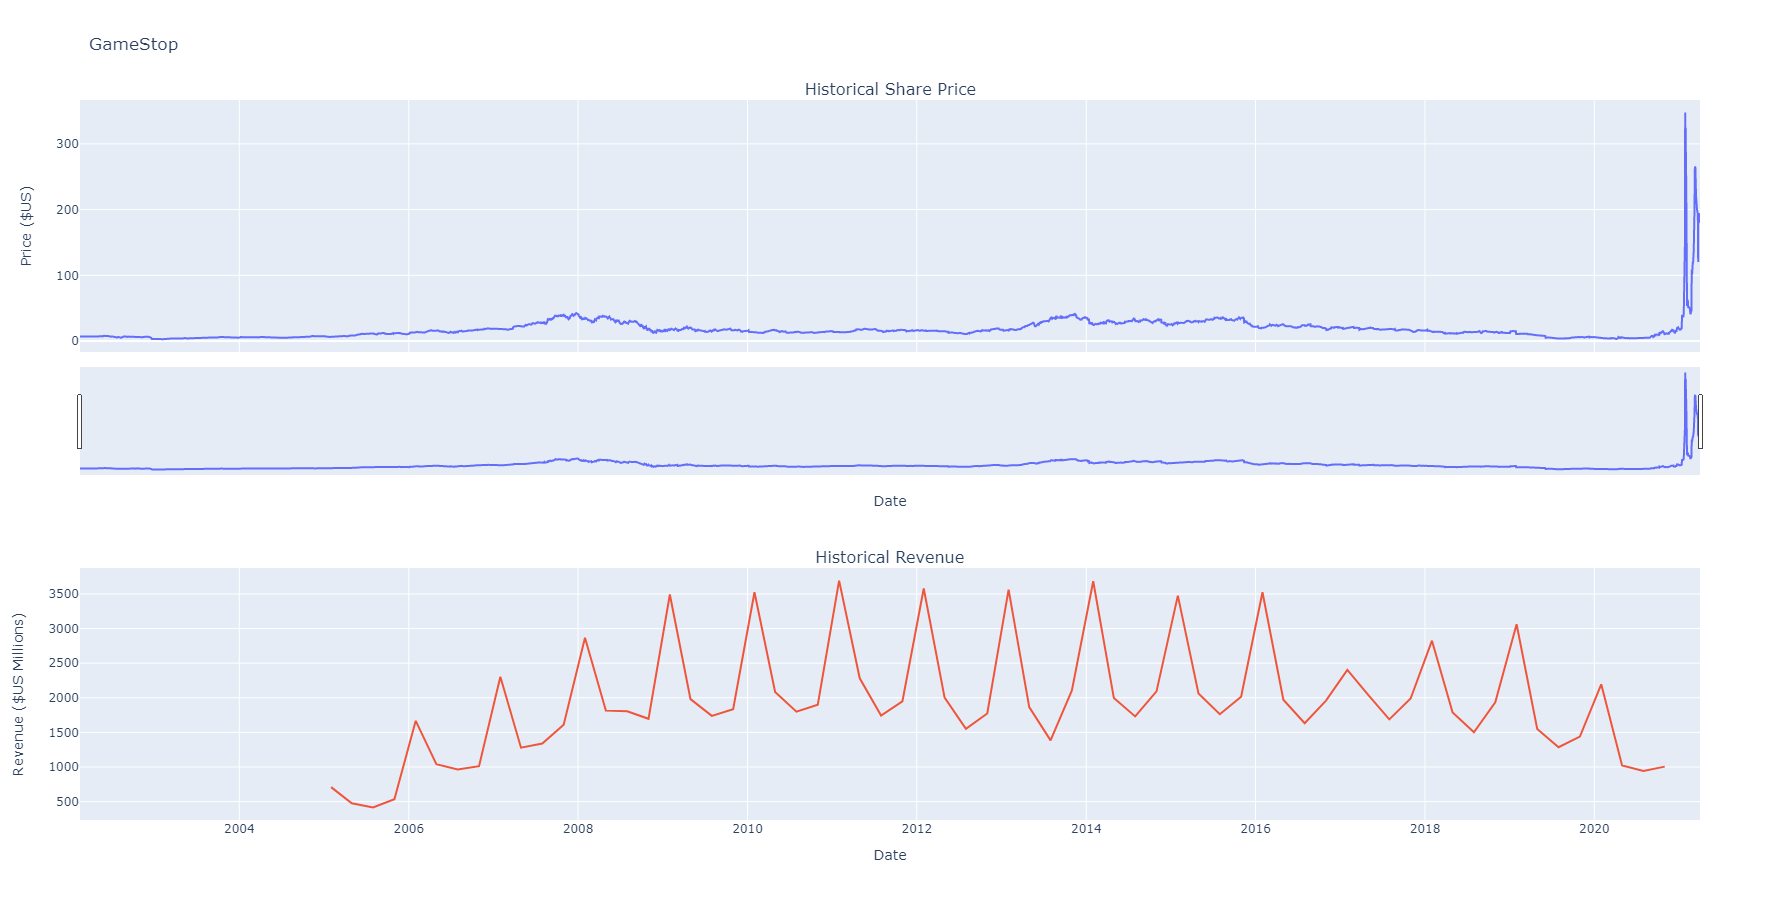

In [48]:
make_graph(gme_data, gme_revenue, 'GameStop')